# <h1 align="center">Machine Learning Assignment # 03</h1>
<h2 align="center">submitted to: Hafiz Abdul Rehman</h2>
<h2 align="center">submitted by: XYZ</h2>
<h2 align="center">Registration #: F---------</h2>
<h3 align="center">University of Management and Technology, UMT Lahore</h3>
<h4 align="center">Dated: 24-Jan-2025</h4>
<br>


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.read_csv('User_Data.csv')
df.head()


,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB
None
              Age  EstimatedSalary   Purchased
count  400.000000       400.000000  400.000000
mean    37.655000     69742.500000    0.357500
std     10.482877     34096.960282    0.479864
min     18.000000     15000.000000    0.000000
25%     29.750000     43000.000000    0.000000
50%     37.000000     70000.000000    0.000000
75%     46.000000     88000.000000    1.000000
max     60.000000    150000.000000    1.000000
Gender
Female    204
Male      196
Name: count, dtype: int64


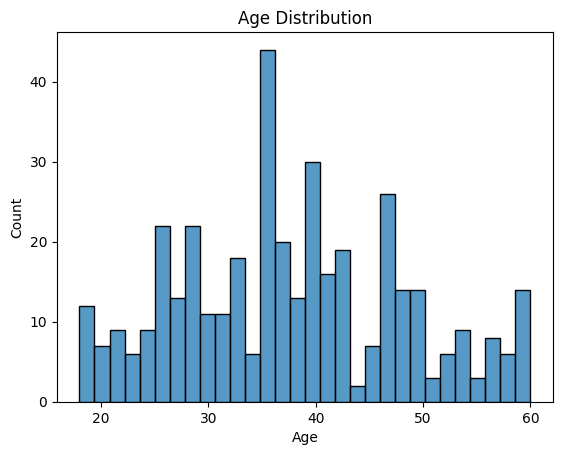

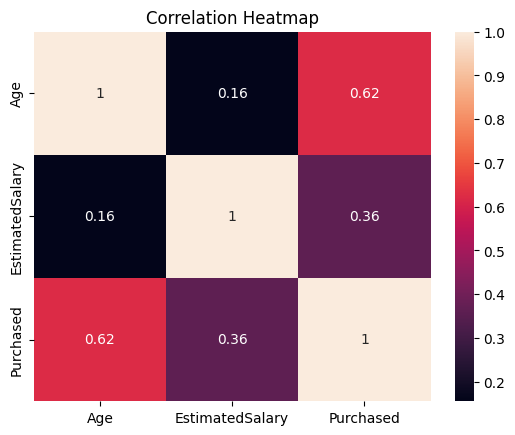

In [39]:
# Check the structure of the dataset
print(df.info())

# Statistical summary
print(df.describe())

# Check for unique values in categorical columns
print(df['Gender'].value_counts())

# Visualizations (optional)
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Age
sns.histplot(df['Age'], bins=30)
plt.title('Age Distribution')
plt.show()

# Correlation heatmap
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [40]:
# Check for null values
print(df.isnull().sum())

# Handling null values (if any)
# For example, you could fill them with the mean or drop them
# data['column_name'].fillna(data['column_name'].mean(), inplace=True)
# or
# data.dropna(inplace=True)

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [41]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Label Encoding for categorical variables
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender']) # Changed 'data' to 'df'

# Feature scaling
scaler = StandardScaler()
df[['Age', 'EstimatedSalary']] = scaler.fit_transform(df[['Age', 'EstimatedSalary']]) # Changed 'data' to 'df'

In [42]:
from sklearn.model_selection import train_test_split

X = df[['Gender', 'Age', 'EstimatedSalary']] # Changed 'data' to 'df'
y = df['Purchased'] # Changed 'data' to 'df'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(SVC(), param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


In [44]:
# Train the SVM model with best parameters
best_svm = grid_search.best_estimator_
best_svm.fit(X_train, y_train)

SVC(C=10, gamma='auto')

In [45]:
from sklearn.metrics import classification_report, confusion_matrix

# Predictions
y_pred = best_svm.predict(X_test)

# Evaluation metrics
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94        73
           1       0.90      0.94      0.92        47

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.93      0.93      0.93       120

Confusion Matrix:
 [[68  5]
 [ 3 44]]


In [46]:
import joblib

# Save the trained model
joblib.dump(best_svm, 'C:\\Users\\AHMAD TURAB\\Desktop\\svm.pkl')

['C:\\Users\\AHMAD TURAB\\Desktop\\svm.pkl']